<a href="https://colab.research.google.com/github/JoanNjoki/Hypothyroid-data-analysis/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2021_06_Joan_Mwangi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HYPOTHYROID DATA ANALYSIS

## a) The Question#
 The aim of this data analysis is to identify common factors among thyroid patients from a survey collected by Nairobi Hospital.

## b) Metric of success
To accurately map out factors that are common among thyroid patients which will aid in creating associations with hypothyroidism.

# c) Context 
Hypothyroid is a condition prevalent among women which occurs when the thyroid glands dont produce enough hormones sufficient for the body. Inadequate production of these hormones leads to slow body activity. This analysis will bring to light symptoms that can easily go unnoticed. Given there is no cure for it, it is essential to narrow down individuals likely to have hypothyroidism.

## d) Recording the experimental design
>The steps to be followed are:

 * Data cleaning
 * Exploratory Data Analysis
 * Carry out any feature engineering
 * Building two forms of advanced decision trees: random forest model and adaboost
 * Narrowing down on the features identified from the decision trees and correctly classifying these features using Support Vector Machines using polynomial,linear and rbf kernel functions
 * Cross-validating the model
 * Accessing the performance of the models using classification report

## e) Data Relevance
The 25 features such as age, gender, tsh, tt4, t4u are  essential in determining  whether the tested thyroid patients have hypothyroidism.

# 2. Reading Data

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC

# 3. Checking the data

In [3]:
data = pd.read_csv('/content/hypothyroid (1).csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#previewing the rows and columns 
print('The dataset has ' + str(data.shape) + ' rows and columns')

The dataset has (3163, 26) rows and columns


In [4]:
#previewing the 5 five rows
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
#previewing the last 5 rows
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
#datatype of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# 4. External Data Source Validation

# 5. Tidying the dataset

In [4]:
#checking the columns
data.columns
#lowering the case of the column names
data.columns = data.columns.str.lower()
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [6]:
#checking for null values
data.isnull().sum().sum()

0

In [9]:
#checking for columns with 0s filled,
(data==0).sum().sum()
#no columns with 0s

0

In [10]:
#I can proceed to check the missing values filled ? and fill them with 0s
(data=='?').sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

The columns: Age,sex, tsh,t3,tt4,t4u,fti,tbg have a special character '?' in place of their missing values

In [5]:
#replacing the ? with 0s then replacing with median 
data['age']  = data['age'].replace('?',0)
data['age']  = data['age'].replace('0',data.age.median())

data['tsh']  = data['tsh'].replace('?',0)
data['tsh']  = data['age'].replace('0',data.tsh.median())

data['t3']  = data['t3'].replace('?',0)
data['t3']  = data['t3'].replace('0',data.t3.median())

data['tt4']  = data['tt4'].replace('?',0)
data['tt4']  = data['tt4'].replace('0',data.tt4.median())

data['t4u']  = data['t4u'].replace('?',0)
data['t4u']  = data['t4u'].replace('0',data.t4u.median())

data['fti']  = data['fti'].replace('?',0)
data['fti']  = data['fti'].replace('0',data.fti.median())

data['tbg']  = data['tbg'].replace('?',0)
data['tbg']  = data['tbg'].replace('0',data.tbg.median())

#filling in for sex column with its mode(F) since its a category column 
data['sex']  = data['sex'].replace('?',0)
data['sex']  = data['sex'].replace(0,'F')


replacing the '?' with median in age, tsh, t3, tt4, t4u, fti, tbg numeric columns. Since median is not affected by  
outliers within the dataset.

In [7]:
#confirming if the ? marks have been filled
(data=='?').sum().sum()

0

There are no null values within the dataset

In [6]:
#checking for duplicates
data.duplicated().sum()
#removing the 77 duplicates from the dataset
data = data.drop_duplicates()
#checking if the have been dropped
data.duplicated().sum()
#there are no duplicates

0

In [14]:
#checking for uniques values
columns =data.columns

unique_values = {col:data[col].unique() for col in columns}
unique_values

{'age': array(['72', '15', '24', '77', '85', '64', '20', '42', '69', '75', '53',
        '59', '68', '50', '78', '65', '28', '43', '40', '84', 0, '83',
        '63', '73', '36', '27', '48', '71', '60', '34', '79', '62', '74',
        '32', '41', '70', '29', '5', '58', '35', '51', '22', '16', '44',
        '39', '47', '18', '17', '88', '56', '30', '45', '66', '52', '54',
        '80', '33', '38', '92', '67', '46', '13', '89', '61', '49', '26',
        '57', '31', '90', '81', '25', '37', '76', '87', '23', '55', '86',
        '98', '21', '97', '1', '6', '14', '82', '11', '19', '9', '12',
        '10', '8', '7', '4', '93'], dtype=object),
 'fti': array(['10', '17', 105.0, '6', '44', '23', '63', '32', '7.50', '61', '41',
        '76', '45', '34', '81', '11', '16', '46', '22', '12', '5', '47',
        '29', '37', '60', '8.40', '8.50', '24', '28', '7', '49', '36',
        '15', '9', '80', '53', '7.20', '68', '6.60', '48', '21', '14', '2',
        '20', '1.40', '56', '3', '51', '13', '43', '78

Changing the datatypes of the columns to be as follows:
*  age,tbg and tsh to integer 
* t3,t4u, fti,tt4,tbg to float 
* status, age, sex, on_thyroxine, query_on_thyroxine,
on_antithyroid_medication, thyroid_surgery, query_hypothyroid,query_hyperthyroid, pregnant, sick, tumor, lithium, goitre,tsh_measured, tsh, t3_measured, tt4_measured,t4u_measured, , fti_measured, , tbg_measured to category

In [8]:
data [['age','tsh']] = data[['age','tsh']].astype(int)
data[['t3','t4u','fti','tt4','tbg']] = data[['t3','t4u','fti','tt4','tbg']].astype(float)
data.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20,22,24]] = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20,22,24]].astype('category')
data.info()
# all columns are in their right datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3079 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3079 non-null   category
 1   age                        3079 non-null   int64   
 2   sex                        3079 non-null   category
 3   on_thyroxine               3079 non-null   category
 4   query_on_thyroxine         3079 non-null   category
 5   on_antithyroid_medication  3079 non-null   category
 6   thyroid_surgery            3079 non-null   category
 7   query_hypothyroid          3079 non-null   category
 8   query_hyperthyroid         3079 non-null   category
 9   pregnant                   3079 non-null   category
 10  sick                       3079 non-null   category
 11  tumor                      3079 non-null   category
 12  lithium                    3079 non-null   category
 13  goitre                     3079 n

# 6. Exploratory Data Analysis

## Univariate Analysis

### Histograms

Text(0.5, 1.0, 'TBG')

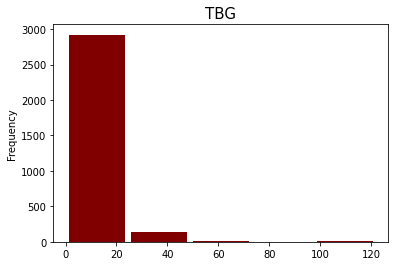

In [16]:
#plotting histogram for tbg
data['tbg'].plot.hist(bins=5, rwidth=0.9, color='maroon')
plt.title('TBG',fontsize=15)

TBG is heavily skewed to the left, with majority of the values ranging from 0 to 20

Text(0.5, 1.0, 'TSH')

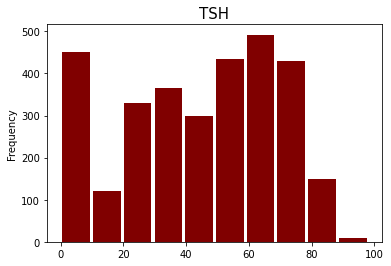

In [17]:
#plotting histogram for tsh
data['tsh'].plot.hist( bins=10, rwidth=0.9, color='maroon')
plt.title('TSH',fontsize=15)

The bin at 60 has the highest frequency

Text(0.5, 1.0, 'TT4')

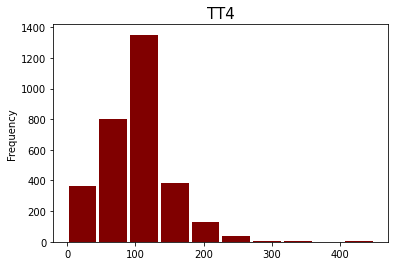

In [18]:
#plotting histogram for tt4
data['tt4'].plot.hist( bins=10, rwidth=0.9, color='maroon')
plt.title('TT4',fontsize=15)

The bin at 100 has the highest frequency with more than 1200 occurrences

### Count plots

Text(0.5, 1.0, 'FTI Measured')

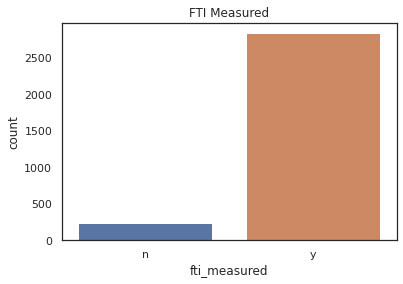

In [19]:
sns.set_theme(style='white')
sns.countplot(x='fti_measured',data=data)
plt.title('FTI Measured',fontsize=12)

Majority of values in fti measured is yes,with a count of more than 2500

Text(0.5, 1.0, 'Hypothyroid Status')

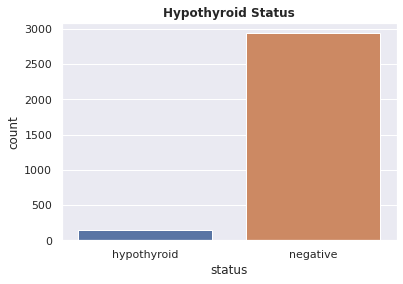

In [20]:
sns.set_theme(style='darkgrid')
sns.countplot(x='status',data=data)
plt.title('Hypothyroid Status',weight='bold',fontsize=12)

Majority of the patients are negative for hypothyroid

Text(0.5, 1.0, 'Gender')

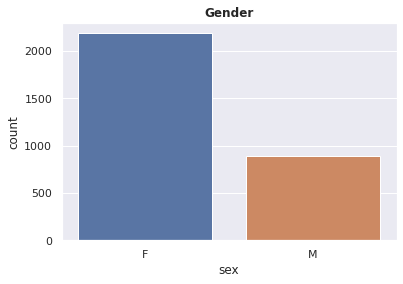

In [21]:
sns.set_theme(style='darkgrid')
sns.countplot(x='sex',data=data)
plt.title('Gender',weight='bold',fontsize=12)

The sample had a majority of females having a record count of more than 2000

Text(0.5, 1.0, 'Are the patients on thyroxine?')

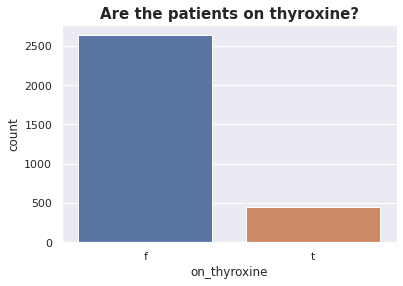

In [22]:
sns.set_theme(style='darkgrid')
sns.countplot(x='on_thyroxine',data=data)
plt.title('Are the patients on thyroxine?',weight='bold',fontsize=15)

Majority of the patients are not on thyroxine having a record of more than 2500

Text(0.5, 1.0, 'Query on thyroxine')

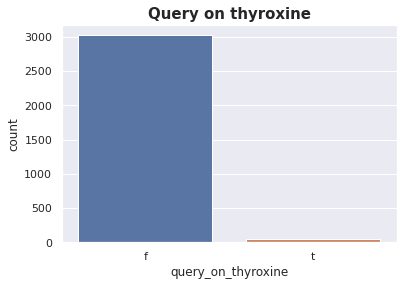

In [23]:
sns.set_theme(style='darkgrid')
sns.countplot(x='query_on_thyroxine',data=data)
plt.title('Query on thyroxine',weight='bold',fontsize=15)

According to query on thyroxine majority of the records are false

Text(0.5, 1.0, 'Pregnant')

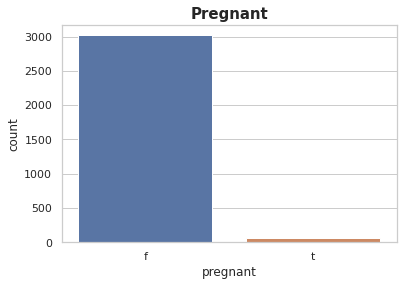

In [24]:
sns.set_theme(style='whitegrid')
sns.countplot(x='pregnant',data=data)
plt.title('Pregnant',weight='bold',fontsize=15)

Majority patients within the sample were not pregnant

Text(0.5, 1.0, 'Sick')

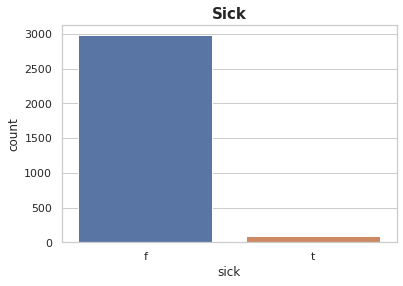

In [25]:
sns.set_theme(style='whitegrid')
sns.countplot(x='sick',data=data)
plt.title('Sick',weight='bold',fontsize=15)

The people within this sample were not sick during the study

## Bivariate Analysis

### Correlation Matrix

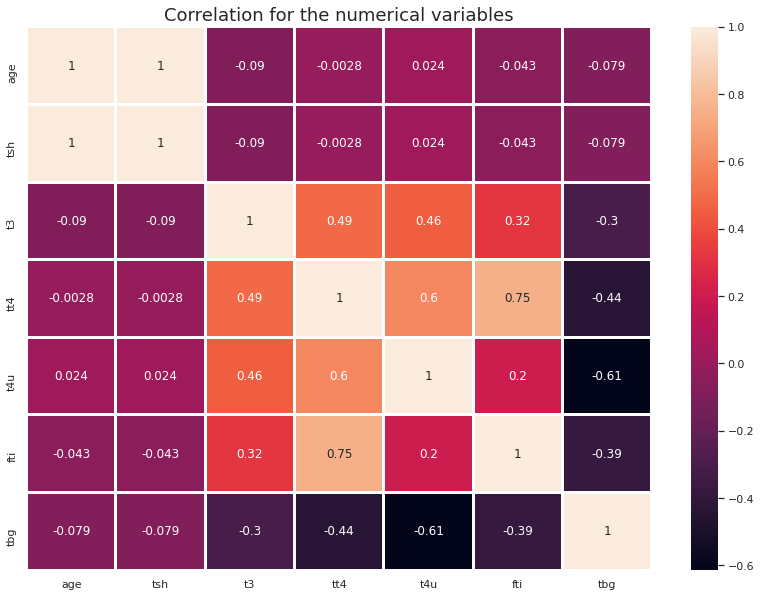

In [26]:
#plotting the correlation matrix
corr = data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=2.0,annot=True)
plt.title('Correlation for the numerical variables',fontsize=18)
plt.show()

In [27]:
x = data.age == data.tsh
x.value_counts()

True    3079
dtype: int64

> Age and tsh have a correlation of 1 showing that one column needs to be dropped. I'll drop tsh column.
Fti is has a strong positive correlation with tt4
Finally, tbg is negatively correlated with t4u.

In [28]:
#dropping the tsh column
data = data.drop('tsh',axis=1)

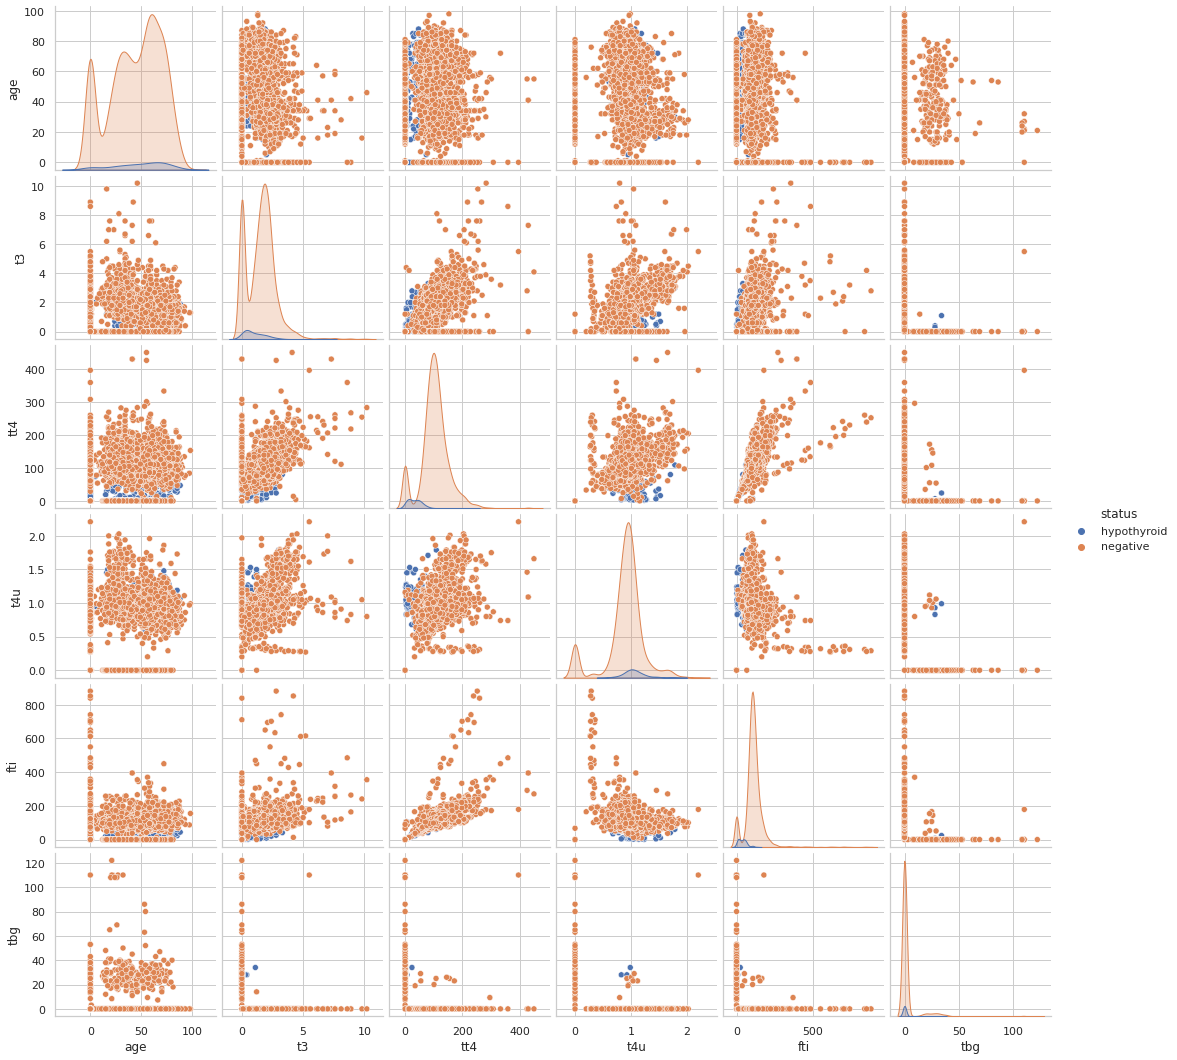

In [ ]:
sns.pairplot(data,hue='status')

Majority of the values within the dataset are negative cases, with age and tsh exhibiting a linear relationship

## Multivariate Analysis:PCA

In [12]:
X = data.drop('status',1)
y = data['status']
#splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#normalizing the feature set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#using pca
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
pca.explained_variance_ratio_

array([2.90659673e-01, 8.41298022e-02, 6.30425574e-02, 6.17480345e-02,
       4.84920292e-02, 4.78249837e-02, 4.37494508e-02, 4.20148826e-02,
       4.01688840e-02, 3.90444681e-02, 3.68468467e-02, 3.55069288e-02,
       3.42861054e-02, 3.23118997e-02, 2.99597521e-02, 2.66066572e-02,
       1.72894987e-02, 1.13115409e-02, 7.21889040e-03, 5.38303300e-03,
       2.40408186e-03, 6.57425626e-33, 8.27986311e-34, 1.27701769e-35,
       2.82656864e-38])

In [13]:
#using random forest for classification 
from sklearn.ensemble import RandomForestClassifier
classified = RandomForestClassifier(max_depth=2,random_state=42)
classified.fit(X_train,y_train)
y_pred = classified.predict(X_test)

In [14]:
#evaluating performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_pred)
print(confusion)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score:',accuracy)

[[  0  30]
 [  0 586]]
Accuracy score: 0.9512987012987013


PCA has classified features within the dataset with an accuracy score of 95%. 30 false positives and 586 true positives.

#Implementing the solution

## Decision Trees:
# 1. Random Forests

###Method 1: Accessing the accuracy and confusion matrix of the Random Forest set at default settings

In [11]:
#changing binary category to numericals
from sklearn.preprocessing import LabelEncoder
features = ['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured','tbg_measured']
data[features] = data[features].apply(LabelEncoder().fit_transform)
#confirming if the columns have been transformed
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,1,72,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,1,15,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0.2,1,4.0,1,1.00,1,105.0,0,0.0
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,1,77,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [32]:
#splitting the dataset
x= data.iloc[:,1:25].values
y = data['status'].values
feature_labels = data.columns.to_list()
feature_labels.remove('status')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=42)

In [33]:
#training and cross validation
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
model1 = forest.fit(x_train,y_train)

In [34]:
y_pred = model1.predict(x_test)
#evaluation and performance
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

Accuracy score: 1.0
Confusion matrix: [[ 1  0]
 [ 0 41]]


> * Attained an accuracy score of 1 meaning all values of y were accurately predicted.
*  According to the confusion matrix, the model got 1 patient  as a true positive case of hypothoroid and 41 true negatives  hypothoroid cases

In [35]:
#looking at the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        41

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



 > *The results imply:*
* A precision of 1 shows that the number of positive hypothyroid cases  have been correctly identified out of all the possible patients with hypothyroid. Since its a ratio of (True Positives / (True Positives + False Negatives))
* A recall of 1 shows that the model has been able to accurately identify relevant data. Given its a ratio of ( True Positives/(True Positives + False Negatives)
* Finally the F1 score of 1, shows that the patients were correcly identified to have hypothyroid

### Method 2: Using Grid search to identify the best parameters for the Random Forest

In [38]:
#setting the parameters from a range of values
n_estimators = [100,300,500,800,1200]
max_depth = [5,10,15,20,25,30]
criterion = ['gini','entropy']


#creating a dictionary with the following parameters
hypermodel = dict(n_estimators=n_estimators,max_depth=max_depth,criterion=criterion)
#Using the model that created the model in this case forest
from sklearn.model_selection import GridSearchCV,KFold
cv =KFold(n_splits=5,shuffle=True)
gr = GridSearchCV(estimator=forest,param_grid=hypermodel,scoring='accuracy')
#fitting the gridsearch to the training set
gr.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [39]:
#the best parameters
gr.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1200}

From the grid search the max depth is 10, criterion is entropy and n_estimators is 100

In [42]:
forest_new = RandomForestClassifier(n_estimators=1200,max_depth=10,criterion='entropy',random_state=42)
forest_new = forest_new.fit(x_train,y_train)
y_pred = forest_new.predict(x_test)

#performance and evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy score: 1.0


Confusion matrix: [[ 1  0]
 [ 0 41]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        41

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



After hyperparameter tuning, the accuracy, reacall, precision and f1 score are still at 100%.

Visualizing the 11th tree of the Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


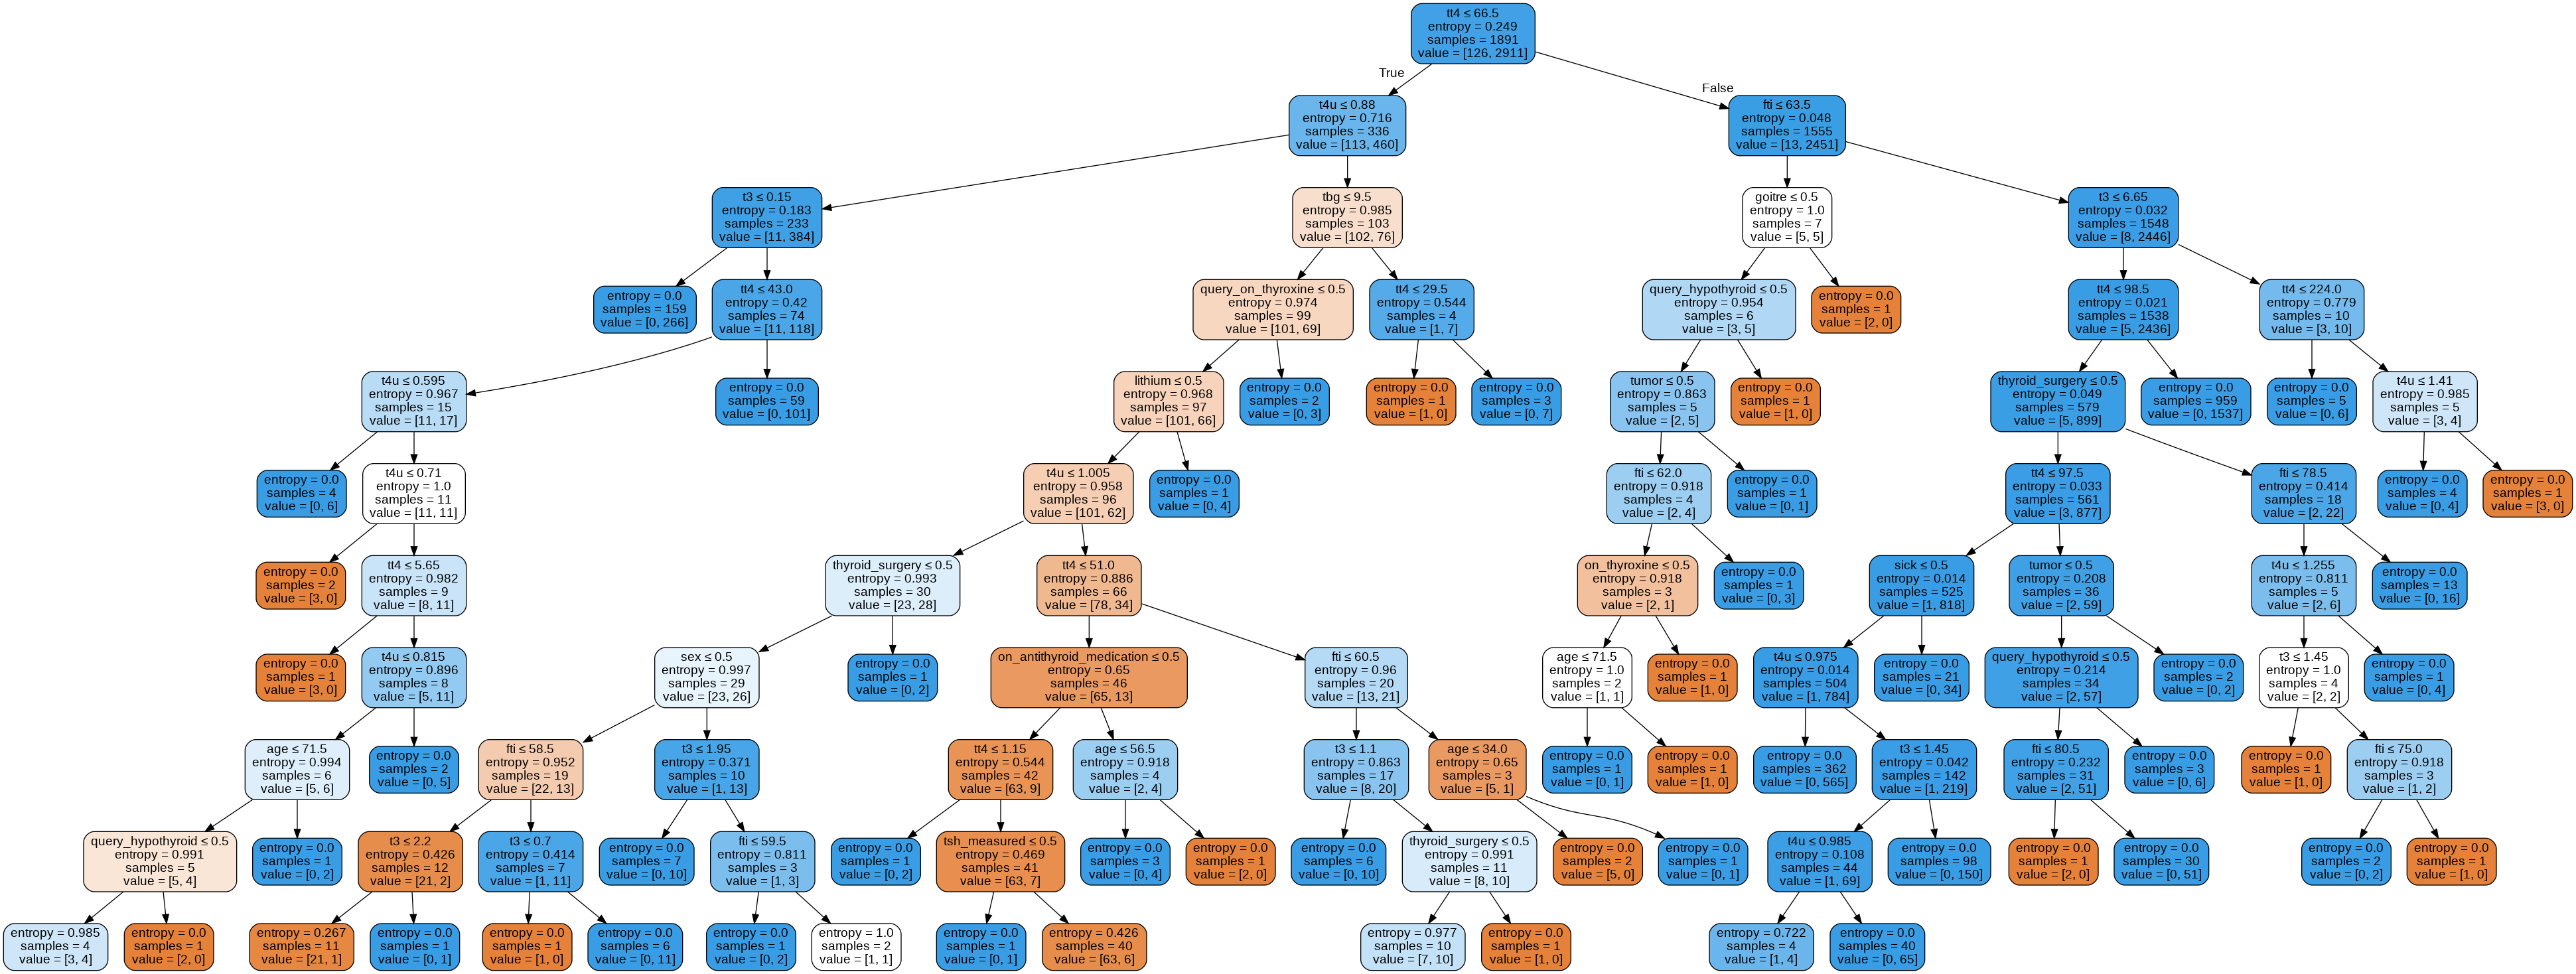

In [43]:
#importing libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
#picking the 11th tree
tree = forest_new.estimators_[11]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroidism.png')
Image(graph.create_png())

### Feature Importance

In [44]:
# numerical features
importances = list(tree.feature_importances_)
#creating a list for the feature importnaces
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, importances)]
#sorting the features in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: tt4                  Importance: 0.44
Variable: t4u                  Importance: 0.28
Variable: fti                  Importance: 0.11
Variable: t3                   Importance: 0.08
Variable: age                  Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: lithium              Importance: 0.01
Variable: tbg                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: tsh_measured         Importance: 0.0
Variable: t3_measured          Importance: 0.0
Variable: tt4_measured         Importance: 

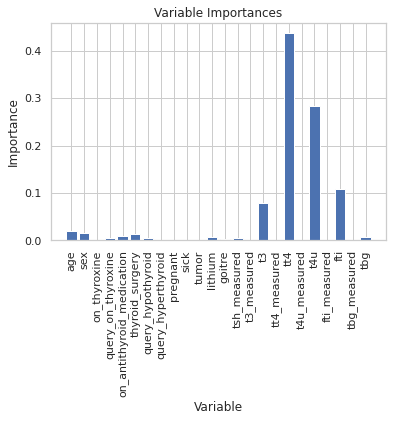

In [45]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

> tt4 has the highest importance in determining the patients hypothoroid status followed by t4u, and fti

## 2.  AdaBoostClassifier

### Method 1 : Without Hyperparameter tuning

In [47]:
#splitting the dataset
x= data.iloc[:,1:25].values
y = data['status'].values
feature_labels = data.columns.to_list()
feature_labels.remove('status')

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_boost = AdaBoostClassifier(random_state=42)
#fitting the model
ada = ada_boost.fit(x_train,y_train)
y_pred = ada.predict(x_test)
#evaluating the performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        41

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



### Method 2 : With Hyperparameter tuning

In [48]:
#setting the range for the hyperparameters
n_estimators = [10,50,250,1000]
learning_rate = [0.01,0.1]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
cvada =KFold(n_splits=5,shuffle=True)
gr = GridSearchCV(estimator=ada,param_grid=param_grid,scoring='f1',cv=cvada)
#fitting the gridsearch to the training set
gr.fit(x,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [49]:
#searching the best parameters
gr.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [51]:
#using the best parameters 
ada= AdaBoostClassifier(random_state=42,learning_rate = 0.1,n_estimators=250)
#fitting the model
ada = ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
#evaluating the performance using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        41

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



According to the results both ADA and Random Forest had the attained the same scores. None is better than the other.

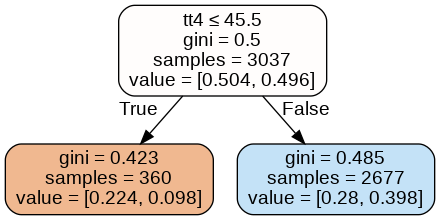

In [52]:
#importing libraries
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
#picking the 11th tree
tree = ada.estimators_[47]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True,feature_names = feature_labels)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroidism.png')
Image(graph.create_png())

### Feature Importance

In [53]:
# numerical features
importances = list(tree.feature_importances_)
#creating a list for the feature importnaces
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_labels, importances)]
#sorting the features in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tt4                  Importance: 1.0
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: tsh_measured         Importance: 0.0
Variable: t3_measured          Importance: 0.0
Variable: t3                   Importance: 0.0
Variable: tt4_measured         Importance: 0.0
Variable: t4u_measured         Importance: 0.0
Variable: t4u                  Importance: 0.0
Variable: fti_measured         Importance: 0.0
Variable

> According to Adaboost tt4 has the highest importance with a score of 1

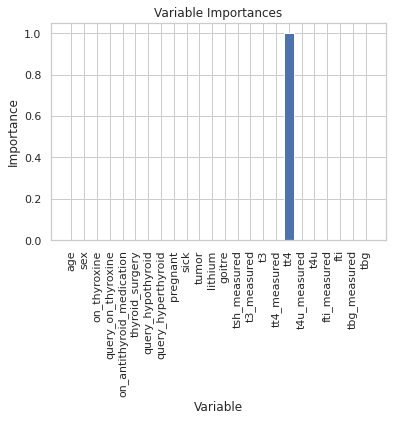

In [54]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Support Vector Machines: Without hyperparameter tuning
# 1. Using Linear Kernel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


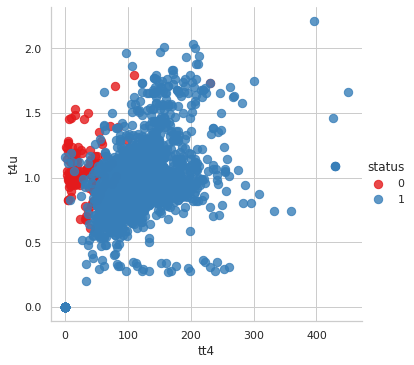

In [67]:
#visualizing tt4 and t4u if they are distinguishable by status
sns.lmplot('tt4','t4u', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [70]:
#using tt4 and t4u as the x variables and status as the y
x = data[['tt4','t4u']].values
y = data['status'].values
#splitting the dataset and using 70% of the dataset as the training set
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

model= SVC(kernel='linear')
model_lin = model.fit(x_train,y_train)

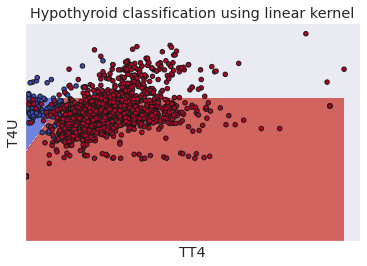

In [74]:
#creating a mesh grid
def mesh_grid(x,y,h=.02):
  x_min,x_max =x.min() -1, x.max() -1
  y_min,y_max = y.min()-1,y.max() -1 
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

#creating hyperplanes
def plot_contours(ax,clf,xx,yy,**params):
  z = model_lin.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  out = ax.contourf(xx,yy,z,**params)
  return out

fig,ax = plt.subplots()
title = ('Hypothyroid classification using linear kernel')

#setting the grid
xo,x1 = x[:,0],x[:,1]
xx,yy = mesh_grid(xo,x1)

plot_contours(ax,model_lin,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
ax.scatter(xo,x1,c =y,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
ax.set_ylabel('T4U')
ax.set_xlabel('TT4')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [81]:
#making predictions
y_pred = model_lin.predict(x_test)
#evaluation
print(classification_report(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.46      0.56        37
           1       0.98      0.99      0.98       887

    accuracy                           0.97       924
   macro avg       0.84      0.73      0.77       924
weighted avg       0.97      0.97      0.97       924

Accuracy score: 0.9707792207792207
Confusion matrix: [[ 17  20]
 [  7 880]]


The model has obtained an accuracy score of 97.07% with 17 true positives and 880 true negatives, and 20 false positives and 7 false negatives.

## 2. Polynomial kernel

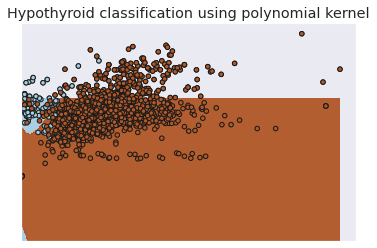

In [96]:
# Building the model 
model_ply = SVC(kernel='poly',degree=2,gamma='auto')
# Training the model using the training set
model_ply.fit(x_train, y_train)
#creating a mesh grid
def mesh_grid(x,y,h=.02):
  x_min,x_max =x.min() -1, x.max() -1
  y_min,y_max = y.min()-1,y.max() -1 
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

#creating hyperplanes
def plot_contours(ax,clf,xx,yy,**params):
  z = model_ply.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  out = ax.contourf(xx,yy,z,**params)
  return out

  
fig,ax = plt.subplots()
title = ('Hypothyroid classification using polynomial kernel')

#setting the grid
xo,x1 = x[:,0],x[:,1]
xx,yy = mesh_grid(xo,x1)
plot_contours(ax, model_ply, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(xo, x1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
plot_contours(ax, model_ply, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(xo, x1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [97]:
#making predictions
y_pred = model_ply.predict(x_test)
#evaluation
print(classification_report(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        37
           1       0.98      0.99      0.99       887

    accuracy                           0.97       924
   macro avg       0.86      0.74      0.79       924
weighted avg       0.97      0.97      0.97       924

Accuracy score: 0.9729437229437229
Confusion matrix: [[ 18  19]
 [  6 881]]


Accuracy obtained is 97.29%,with 18 true negatives and 881 true positives, and 6 false negatives and 19 false positives. 


## 3. Using RBF Kernel

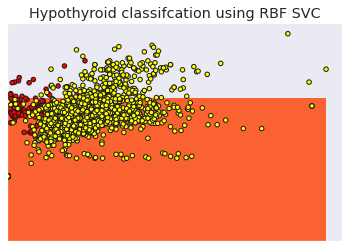

In [102]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
#creating a mesh grid
def mesh_grid(x,y,h=.02):
  x_min,x_max =x.min() -1, x.max() -1
  y_min,y_max = y.min()-1,y.max() -1 
  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy
#creating hyperplanes
def plot_contours(ax,clf,xx,yy,**params):
  z = model_rbf.predict(np.c_[xx.ravel(),yy.ravel()])
  z = z.reshape(xx.shape)
  out = ax.contourf(xx,yy,z,**params)
  return out


#setting the grid
fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid classifcation using RBF SVC')
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
xx, yy = mesh_grid(X0, X1)

plot_contours(ax, model_rbf, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [103]:
#making predictions
y_pred = model_rbf.predict(x_test)
#evaluation
print(classification_report(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Confusion matrix:',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.96      1.00      0.98       887

    accuracy                           0.96       924
   macro avg       0.48      0.50      0.49       924
weighted avg       0.92      0.96      0.94       924

Accuracy score: 0.95995670995671
Confusion matrix: [[  0  37]
 [  0 887]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using rbf, the accuracy is 95%, with 0 true negatives and 887 true positives.
Without hyperparameter tuning the model that attained the highest accuracy is Polynomial SVC

## SVM with hyperparameter tuning

In [ ]:
#using most features
from sklearn.model_selection import GridSearchCV
x= data.iloc[:,1:25].values
y = data['status'].values
param_grid = {'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(x,y)

In [ ]:
#obtaining optimal parameters
grid.best_estimator_

*In conclusion*, Random Forest and ADA were the  best models with 100% accuracy,precision,recall and f1 score.
Using SVM,Polynomial(degrees=2) had the highest score with 97.29% accuracy followed by Linear with 97.07.
Overall, the two  Advanced Decision tree models are appropriate for this classification.
TT4 and T4U are the features with the highest importance, and differientiates patients with hypothyroidism and those without.
However, it is good to note that majority  of the patients within the sample were tested negative for hypothyroidism.

# 9. Follow up questions

## Did we have the right dataset?
Yes, the variables within the dataset affect hypothyroidism

## Do we need another data to answer the question?
The dataset was sufficient. The features within the dataset related to patients having particular set of hormones, tt4, fti and t4u with a majority of the sample population being women. A group mostly affected by hypothyroid. 
Nonetheless, the dataset should have an equal proportion on the patients status which will aid in making the model more robust.

## Did we have the right question?
Yes the question ---> determining status of the patients with hypothyroid or not --- related to the rest of the features within the dataset.